# Spectrogram

In [1]:
import numpy as np
import scipy.io as sio
from scipy import signal
from scipy.fft import fft
import matplotlib.pyplot as plt

In [2]:
mat = sio.loadmat('data/sampleEEGdata.mat')
EEG = mat['EEG']
srate = EEG['srate'][0][0][0][0]
times = EEG['times'][0][0]
data = EEG['data'][0][0]

print(srate)
print(times.shape)
print(data.shape)

256
(1, 640)
(64, 640, 99)


**Q**: How can I plot signal in time domain using sampling frequency and data?

In the data matrix, the 3rd dimension is of size 99, which represents the number of trials of the EEG experiment. In this case, we're interested in data from any one of the trials.

In [3]:
data = data[:,:,0]
times = times.reshape(-1,1)
print(data.shape)
print(times.shape)

(64, 640)
(640, 1)


Now we're left with a signal that has 64 channels and 640 datapoints. We select the first channel from the list of channels.

In [4]:
ch = data[0,:]
ch.shape

(640,)

This gives the time domain representation of the signal.

Text(0, 0.5, 'Amplitude')

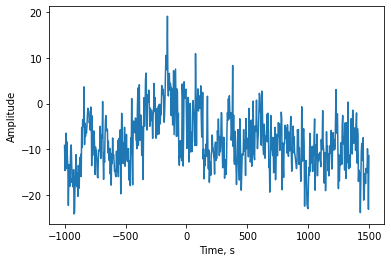

In [5]:
fig, ax = plt.subplots()
ax.plot(times, ch)
ax.set_xlabel('Time, s')
ax.set_ylabel('Amplitude')

## STFT

Now, we will use FFT to transform the representation of this signal into the frequency domain. More specifically, we apply STFT to produce a spectrogram, which shows how the spectrum of frequencies of a signal varies with time.

**Q:** How can I produce a spectrogram using STFT?

We now want to perform STFT on 0.5s window of EEG signal. To do this, we first need to know what the window length of 30s is in terms of index.

In [6]:
timewin = 0.5 # in seconds
timewinidx = np.round(timewin/(1/srate)).astype(int)
print(timewinidx)

128


In [7]:
ch.shape

(640,)

We perform STFT with a Hann window and 50% overlap (default parameter) and linear detrend.

In [8]:
f, t, Zxx = signal.stft(ch, fs=srate, window='hann',
                        nperseg=timewinidx, noverlap=None, nfft=None,
                        detrend='linear', return_onesided=True)

This can now be plotted to produce a spectrogram.

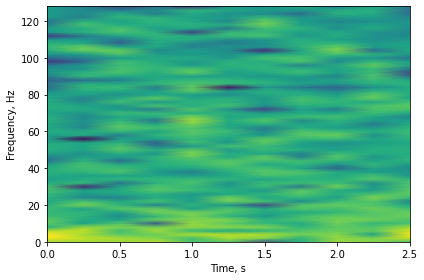

In [9]:
fig, ax = plt.subplots()
ax.pcolormesh(t, f, np.log10(np.abs(Zxx)), shading='gouraud')
ax.set_xlabel('Time, s')
ax.set_ylabel('Frequency, Hz')
fig.tight_layout()
fig.savefig('figures/stft_spectrogram.png')